In [35]:
import scipy as sp
import scipy.stats

In [91]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [1]:
sns.set_style('whitegrid')

## 확률분포의 결정

- 데이터가 0 또는 1 -> 베르누이분포
- 데이터가 카테고리값 -> 카테고리분포
- 데이터가 0과 1사이 실수값 -> 베타분포
- 데이터는 항상 0 또는 양수 -> 로그정규분포, 감마분포, F분포, 카이제곱분포, 지수분포, 하프코시분포
- 데이터가 크기 제한이 없는 실수 -> 정규분포 또는 스튜던트 t분포, 코시분포, 라플라스분포 등

### Boston 주택가격 데이터의 분포 설명

In [84]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

In [85]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


각 데이터의 확률분포 특성

In [87]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [86]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


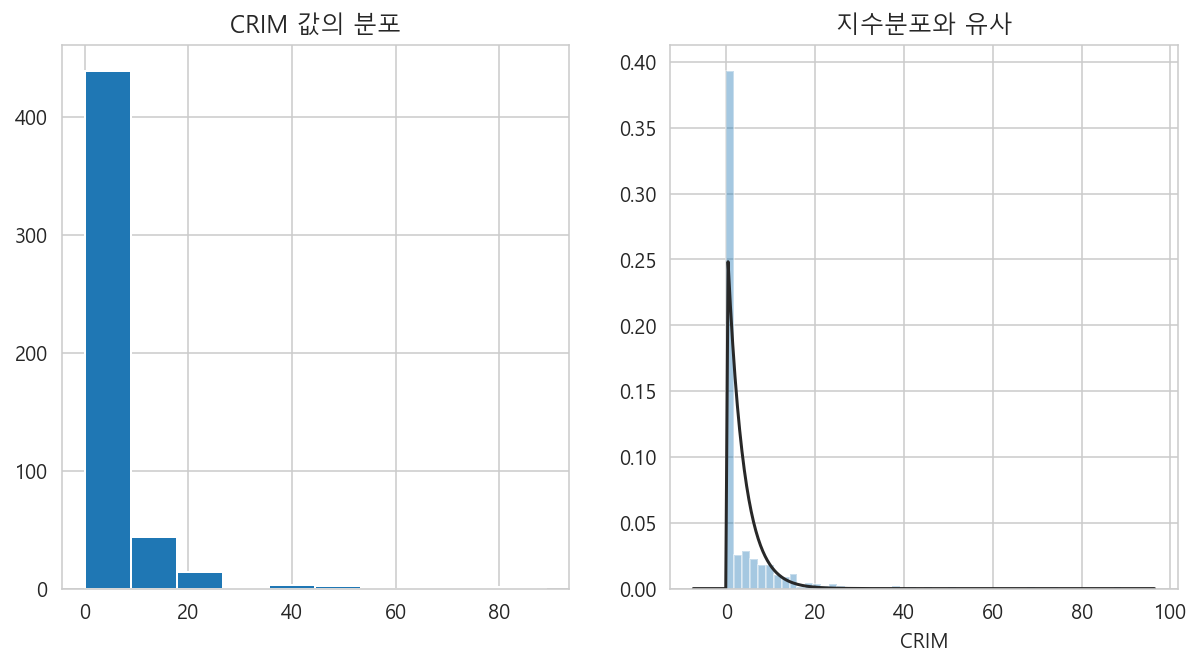

In [108]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
df['CRIM'].hist()
plt.title('CRIM 값의 분포')
plt.subplot(122)
sns.distplot(df['CRIM'], kde=False, fit=sp.stats.expon)
plt.title('지수분포와 유사')
plt.show()

>지수분포는 0근처의 값이 가장 많은 특성을 가짐

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


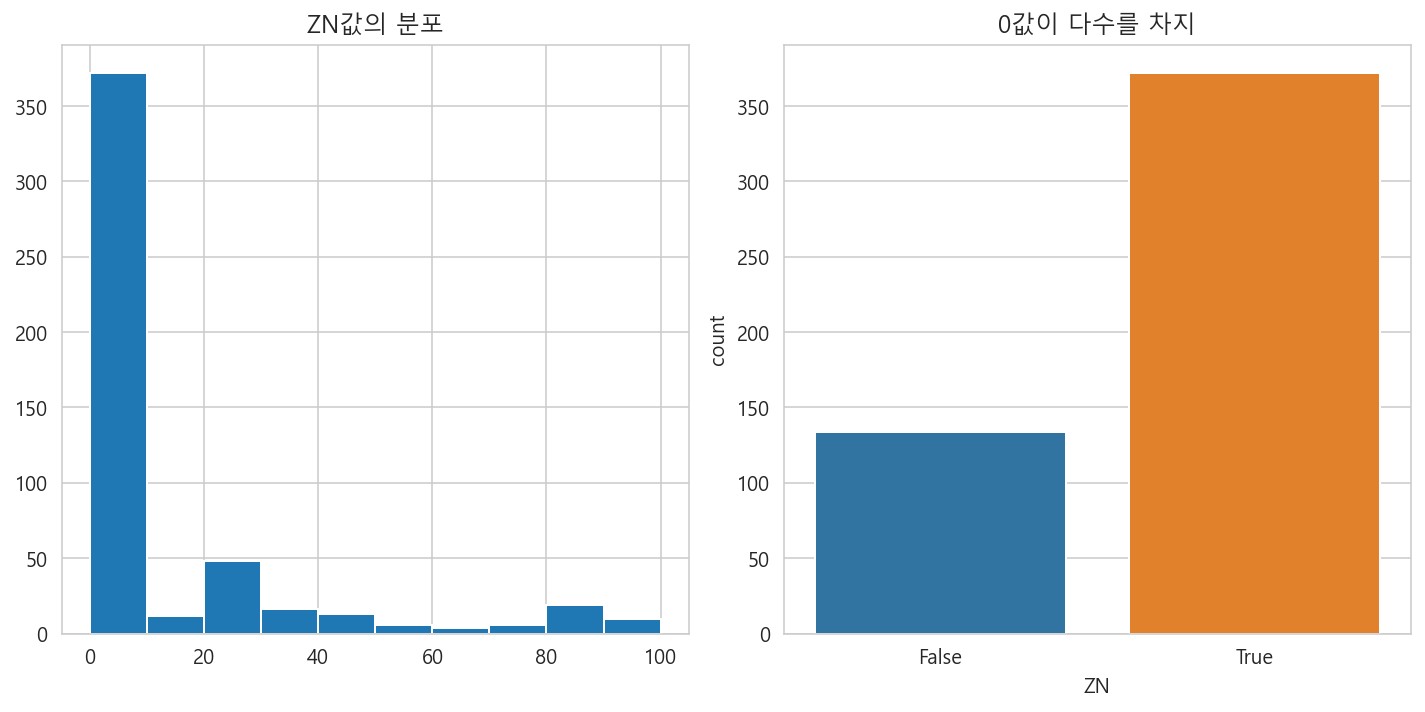

In [116]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(df['ZN'])
plt.title('ZN값의 분포')
plt.subplot(122)
sns.countplot(df['ZN']==0)
plt.title('0값이 다수를 차지')
plt.tight_layout()
plt.show()

ZN의 경우 0값이 대다수를 차지하는 균일분포와 유사

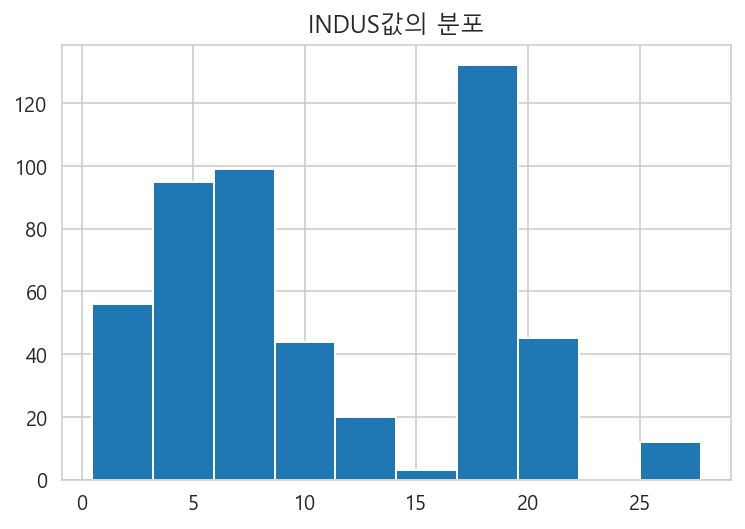

In [120]:
plt.hist(df['INDUS'])
plt.title('INDUS값의 분포')
plt.show()

>INUDS값은 다봉분포

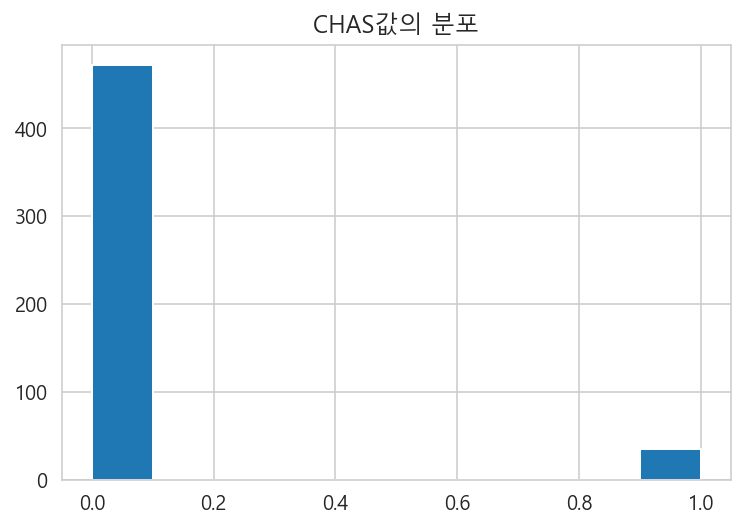

In [122]:
plt.hist(df['CHAS'])
plt.title('CHAS값의 분포')
plt.show()

>CHAS값은 0과 1을 갖는 베르누이분포

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


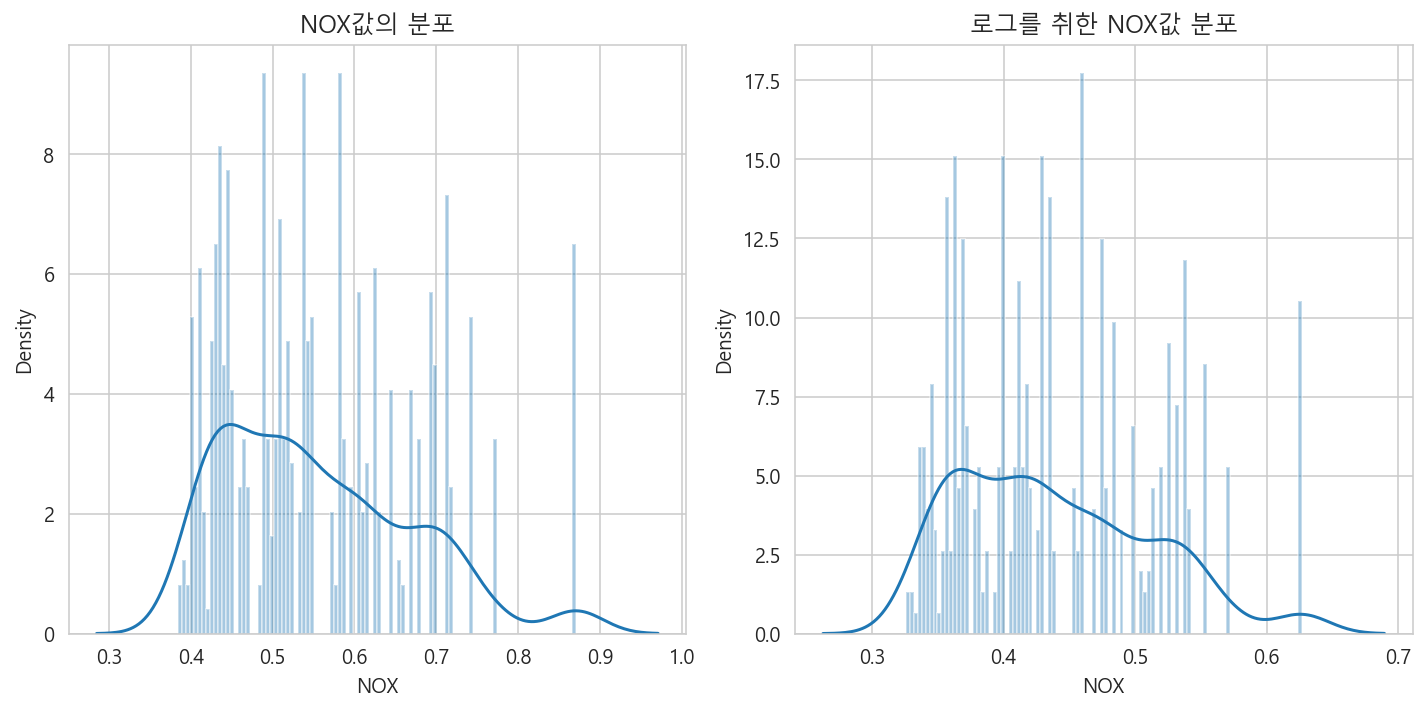

In [129]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['NOX'], bins=100)
plt.title('NOX값의 분포')
plt.subplot(122)
sns.distplot(np.log1p(df['NOX']), bins=100)
plt.title('로그를 취한 NOX값 분포')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


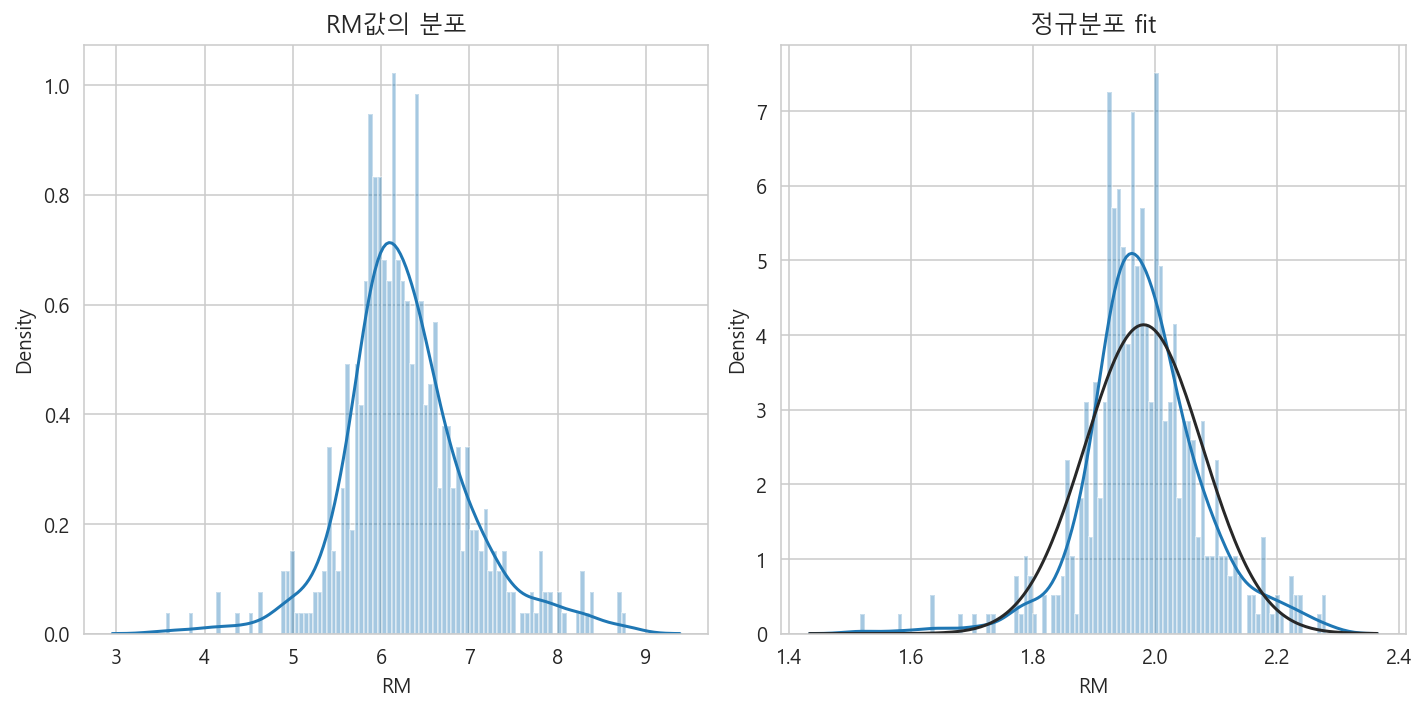

In [133]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['RM'], bins=100)
plt.title('RM값의 분포')
plt.subplot(122)
sns.distplot(np.log1p(df['RM']), bins=100, fit=sp.stats.norm)
plt.title('정규분포 fit')
plt.tight_layout()
plt.show()

>RM은 정규분포와 유사

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


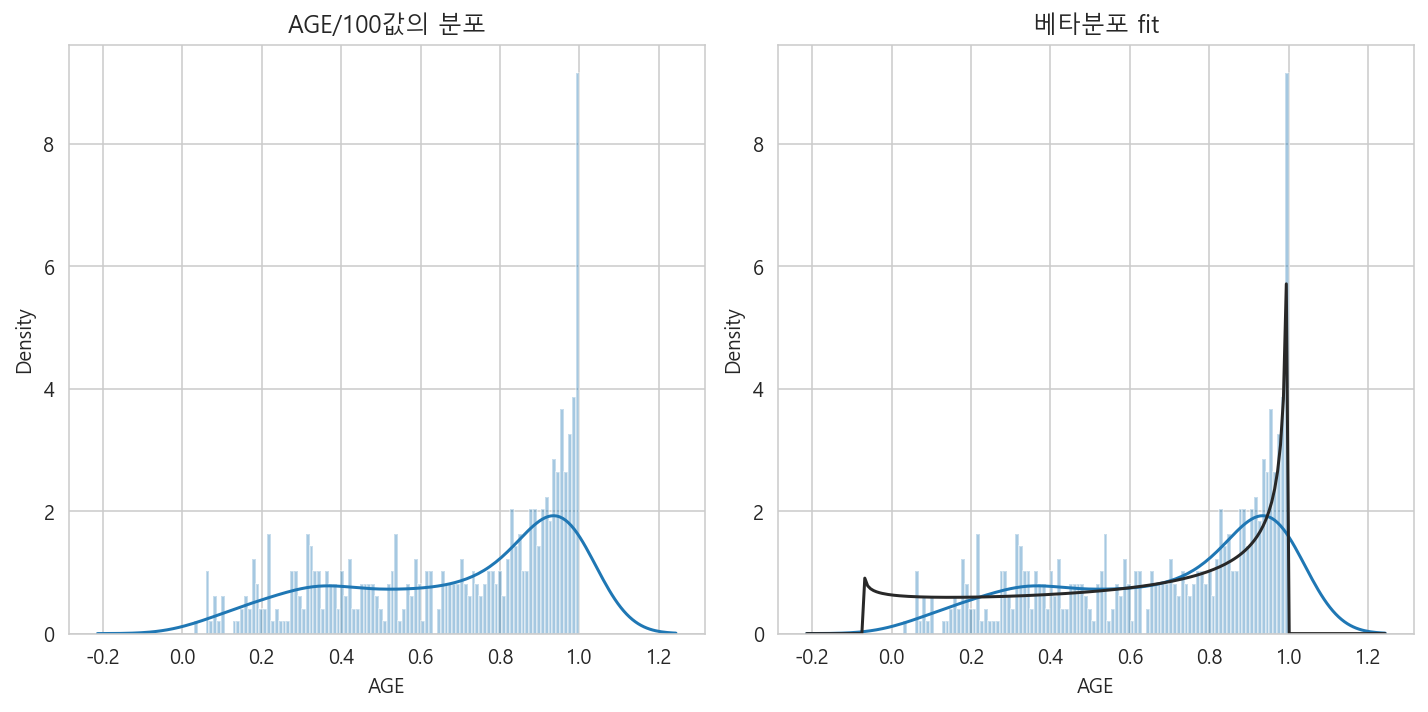

In [137]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['AGE']/100, bins=100)
plt.title('AGE/100값의 분포')
plt.subplot(122)
sns.distplot(df['AGE']/100, bins=100, fit=sp.stats.beta)
plt.title('베타분포 fit')
plt.tight_layout()
plt.show()

> AGE를 100으로 나누면 0부터 1의 값을 갖는 베타분포로 표현가능

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


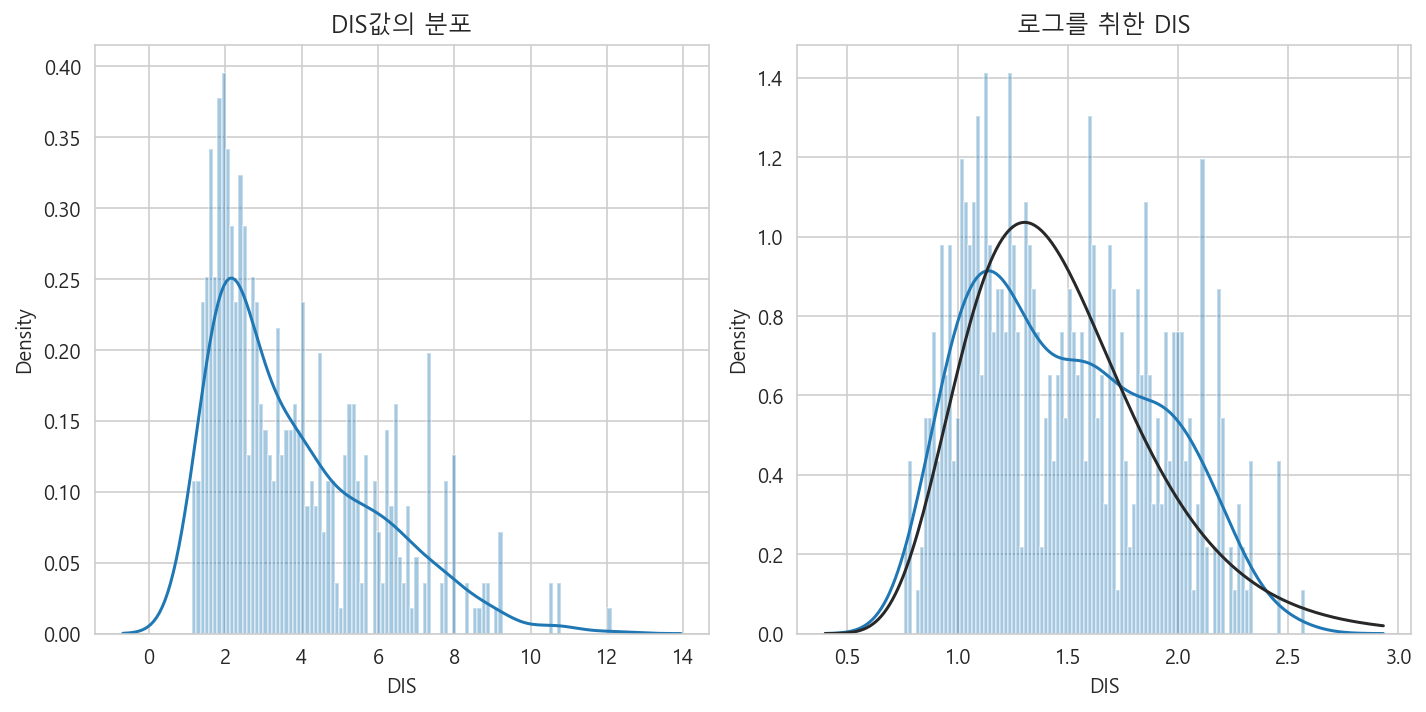

In [141]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['DIS'], bins=100)
plt.title('DIS값의 분포')
plt.subplot(122)
sns.distplot(np.log1p(df['DIS']), bins=100, fit=sp.stats.lognorm)
plt.title('로그를 취한 DIS')
plt.tight_layout()
plt.show()

> DIS는 로그정규분포와 유사

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


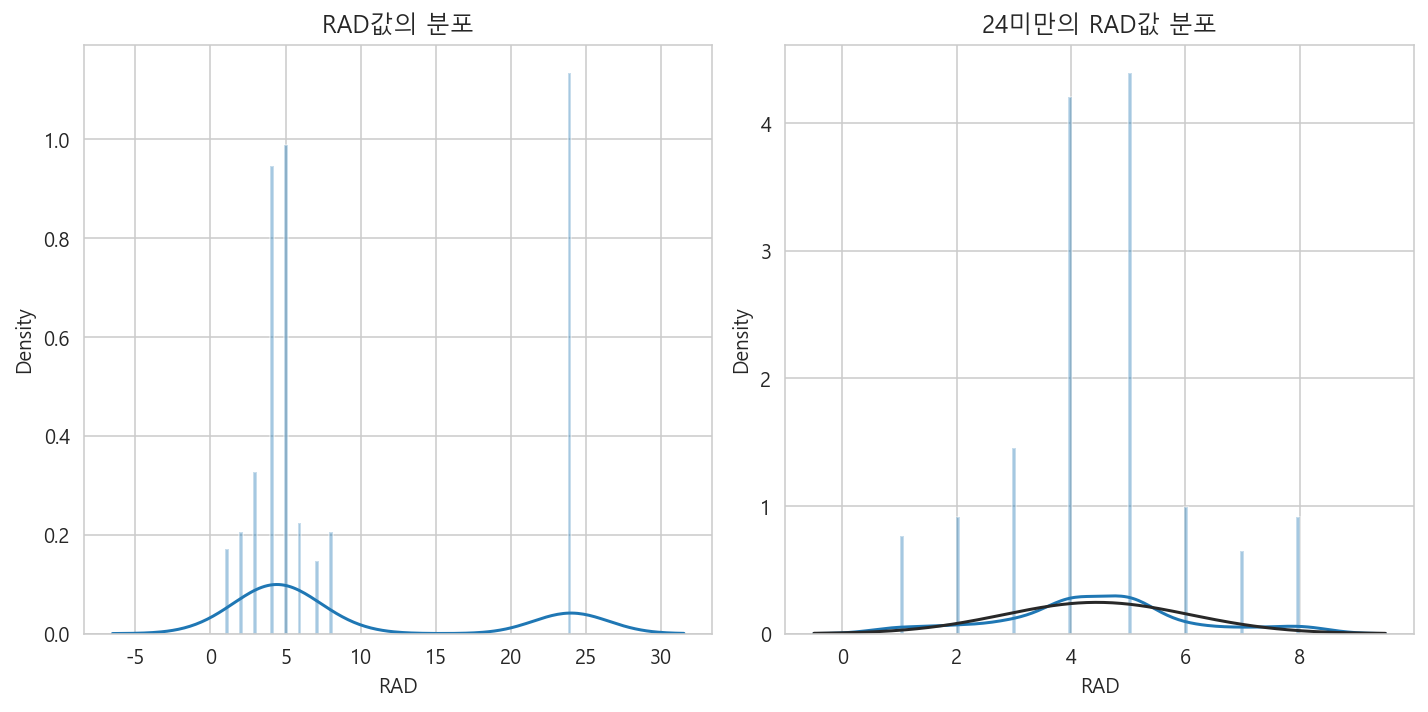

In [155]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['RAD'], bins=100)
plt.title('RAD값의 분포')
plt.subplot(122)
sns.distplot(df[df['RAD'] < 24]['RAD'], bins=100, fit=sp.stats.norm)
plt.title('24미만의 RAD값 분포')
plt.tight_layout()
plt.show()

> 24 미만의 값으로 제한하면 정규분포를 따름

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


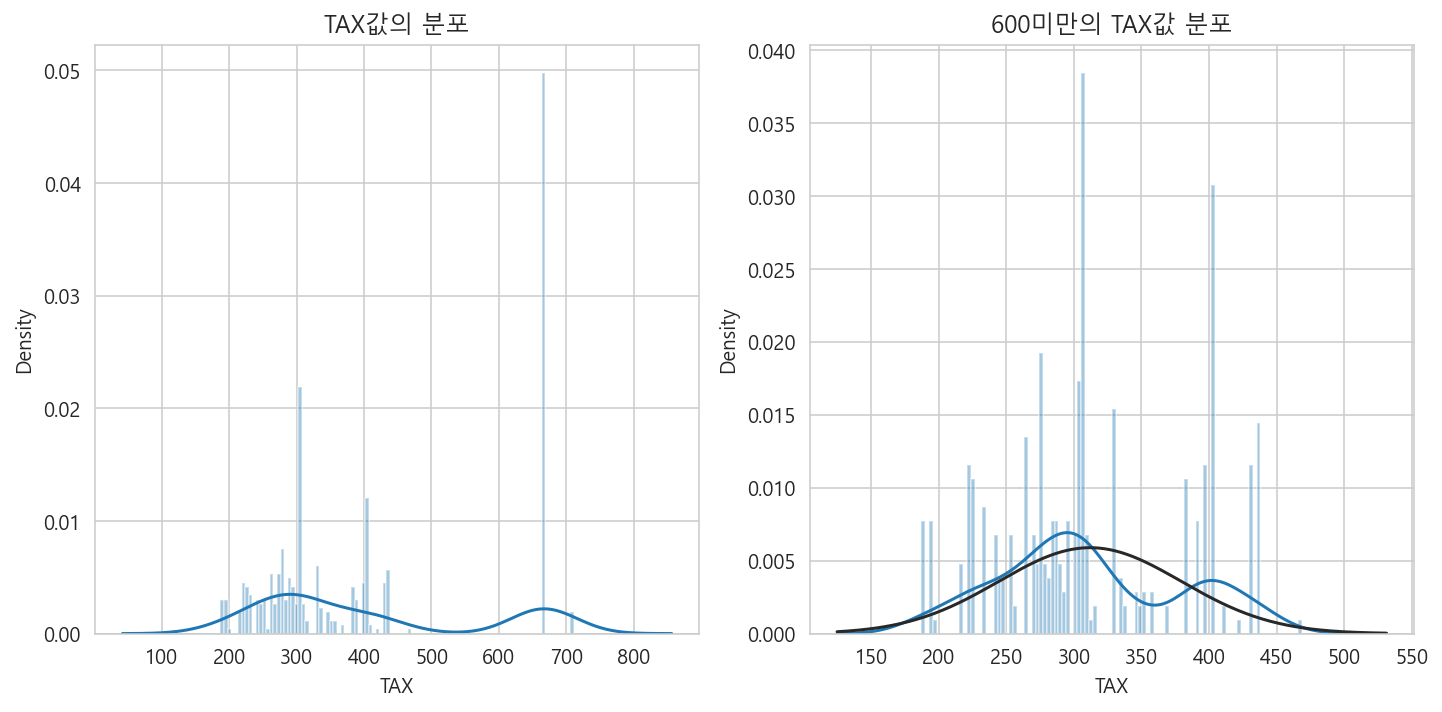

In [160]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['TAX'], bins=100)
plt.title('TAX값의 분포')
plt.subplot(122)
sns.distplot(df[df['TAX'] < 600]['TAX'], bins=100, fit=sp.stats.norm)
plt.title('600미만의 TAX값 분포')
plt.tight_layout()
plt.show()

>600미만의 값으로 제한하면 정규분포를 따름

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


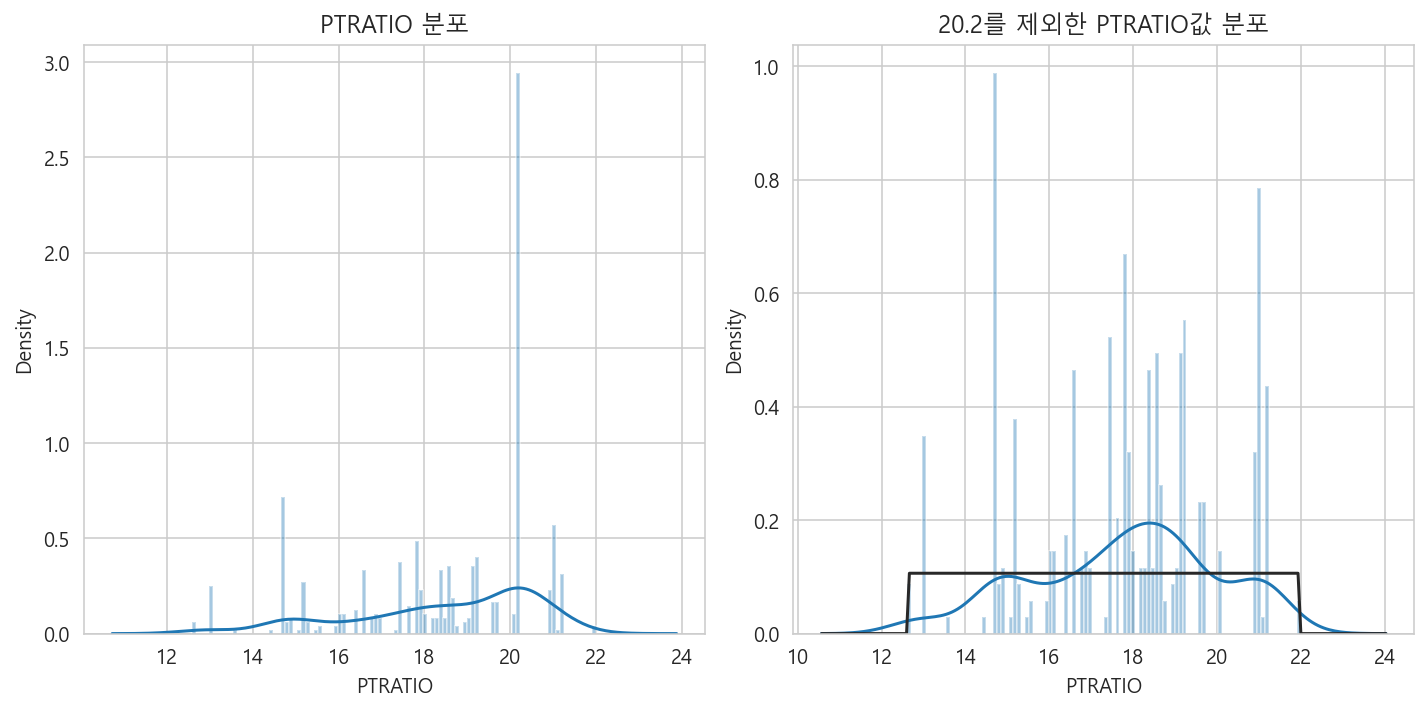

In [166]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['PTRATIO'], bins=100)
plt.title('PTRATIO 분포')
plt.subplot(122)
sns.distplot(df[df['PTRATIO'] != 20.2]['PTRATIO'], bins=100, fit=sp.stats.uniform)
plt.title('20.2를 제외한 PTRATIO값 분포')
plt.tight_layout()
plt.show()

>20.4를 제외하면 균일분포를 따름

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


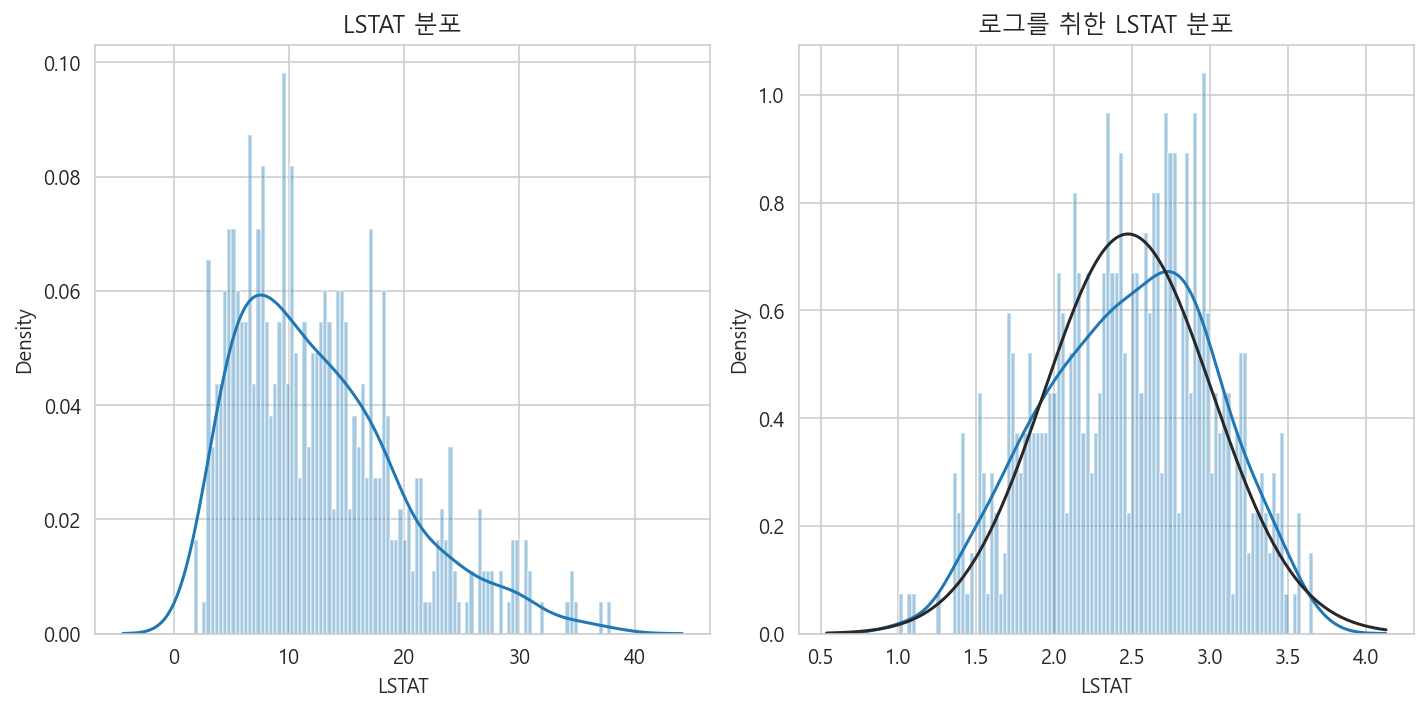

In [170]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.distplot(df['LSTAT'], bins=100)
plt.title('LSTAT 분포')
plt.subplot(122)
sns.distplot(np.log1p(df['LSTAT']), bins=100, fit=sp.stats.lognorm)
plt.title('로그를 취한 LSTAT 분포')
plt.tight_layout()
plt.show()

> LSTAT분포는 로그정규분포를 따름

## 모수추정방법론

모수의 값으로 가장 가능성이 높은 하나의 숫자를 찾아내는 방법(parameter estimation)

- 모멘트방법
- 최대가능도 추정법
- 베이즈추정법

## 모멘트방법

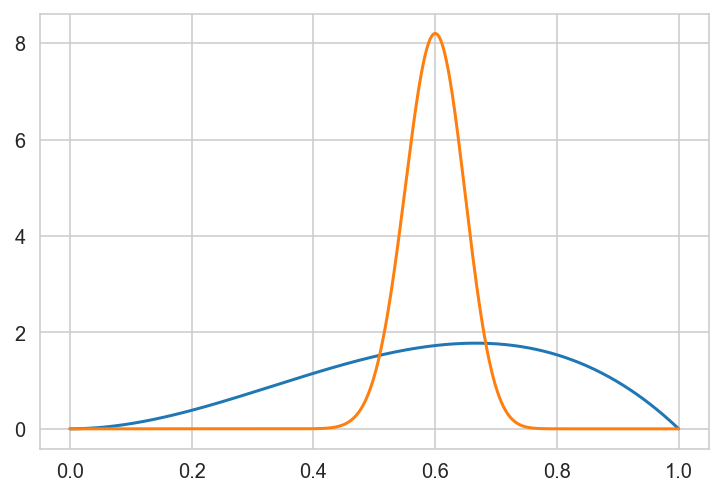

In [83]:
xx = np.linspace(0, 1, 1000)
rv = sp.stats.beta(3, 2)
rv2 = sp.stats.beta(61, 41)
pdf = rv.pdf(xx)
pdf2 = rv2.pdf(xx)

plt.plot(xx, pdf)
plt.plot(xx, pdf2)
